In [48]:
import pandas as pd
import numpy as np

In [49]:
from collections import Counter

In [50]:
mag_jenny = pd.read_csv('./magazine/final/mag_je_adfn.csv', sep='|', encoding = 'utf-8')

In [51]:
mag_jenny

,magazine,brand,category,title,link,date,contents,title_brand,word_jenny,ADFN
0,Allure,Je,BEAUTY,싹쓰리 이효리부터 블랙핑크 제니까지. 눈 앞머리 하이라이트의 정체는?,http://www.allurekorea.com/2020/07/28/%ec%8b%b...,2020/07/28/,"[""['싹쓰리의 린다G, 블랙핑크 제니, 청하 그 외 등등 많은 셀럽들이 공통적으로...",1,"싹쓰리의 린다G, BLACKPINK 제니, 청하 그 외 등등 많은 셀럽들이 공통적으...","['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '셀럽', ..."
1,Allure,Je,FASHION,제니의 레오퍼드 부터 강민경의 플라워까지. 패턴부자 셀럽들의 서머 원피스 룩.,http://www.allurekorea.com/2020/05/21/%ec%a0%9...,2020/05/21/,"[""['셀럽 픽 서머 패턴은 무엇?"", '@jennierubyjane', '레오퍼드...",1,"셀럽 픽 서머 패턴은 무엇?, @jennierubyjane, 레오퍼드 패턴 슬립 드...","['셀럽', '픽', '서머', '패턴', '레오퍼드', '패턴', '슬립', '드..."
2,Allure,Je,BEAUTY,"있잖아 아이유, 조이, 제니의 공통점이 뭔지 알아?",http://www.allurekorea.com/2020/05/09/%ec%9e%8...,2020/05/09/,['곱창밴드에 꽂혔다는 것! 세 스타가 보여준 곱창밴드로 머리 예쁘게 묶는 법 그 ...,1,#2. 제니식 곱창밴드 소화법_높게 올려 묶은 반묶음으로 힙하게!n이 스타일은 지금...,"['제니', '곱창', '밴드', '화법', '높게', '묶음', '힙하', '스타..."
3,Allure,Je,BEAUTY,준비물 ‘미모’ 없어도 가능! 제니처럼 머리띠 예쁘게 하는 법,http://www.allurekorea.com/2020/04/08/%ec%a4%8...,2020/04/08/,"['돌아온 탑골 아이템, 머리띠! 촌스러워 보였는데, 제니가 하니까 따라 하고 싶잖...",1,"돌아온 탑골 아이템, 머리띠! 촌스러워 보였는데, 제니가 하니까 따라 하고 싶잖아요...","['탑골', '아이템', '머리띠', '촌스러워', '제니', '그렇잖아요', '작..."
4,Allure,Je,FASHION,"나만 몰랐던 한겨울의 데님 스타일! 한예슬, 제니도 빠진 윈터 데님룩.",http://www.allurekorea.com/2020/01/03/%ec%95%a...,2020/01/03/,['@jennierubyjane\n곰돌이 룩으로 화제를 모았던 제니의 공항 스타일링...,1,@jennierubyjanen곰돌이 룩으로 화제를 모았던 제니의 공항 스타일링. 데...,"['곰돌이', '룩', '화제', '제니', '공항', '스타', '일링', '데님..."
...,...,...,...,...,...,...,...,...,...,...
292,W,Je,W HOT ISSUE,"블랙핑크X세레나 고메즈 영상통화, 협업 티징",http://www.wkorea.com/2020/08/24/%eb%b8%94%eb%...,2020-08-24,"['서로의 팬임을 인증한 두 스타', '8월 28일 블랙핑크와 세레나 고메즈가 함께...",1,"서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션..."
293,W,Je,W HOT ISSUE,블랙핑크가 아이스크림 셀카를 올린 이유는?,http://www.wkorea.com/2020/07/20/%eb%b8%94%eb%...,2020-07-20,"['‘내셔널 아이스크림 데이’를 기념한 블랙핑크의 귀여운 포스팅.', '제니와 리사...",1,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '제니..."
294,W,Je,"FASHION, 뉴스",블랙핑크 컴백! 남다른 패션 스타일링,http://www.wkorea.com/2020/06/26/%eb%b8%94%eb%...,2020-06-26,"['한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑', '6월 26일 드디...",1,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ..."
295,W,Je,W HOT ISSUE,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다",http://www.wkorea.com/2020/06/01/%eb%b8%94%eb%...,2020-06-01,"['블랙핑크 로제, 리사, 지수의 솔로곡이 발매된다.', '', '오는 9월 첫 정...",1,"BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['솔로', '곡', '발매', '첫', '정규', '앨범', '컴백', '예정',..."


In [52]:
mag_jenny['ADFN_2'] = mag_jenny['ADFN']

In [53]:
for word in mag_jenny['word_jenny']:
    if '걸' in word:
        print(word)
        print('-'*50)

돌아온 탑골 아이템, 머리띠! 촌스러워 보였는데, 제니가 하니까 따라 하고 싶잖아요. 그렇잖아요!n작년부터 제니로부터 시작된 이 헤어밴드 스타일링은 요즘 포털 사이트 헤어 액세서리 쇼핑 검색어에도 상위권을 유지하면서 꾸준히 관심을 받고 있어요. 헤어밴드의 위치를 어디에 두느냐에 따라서 분위기가 확 달라지는데요 이상하게 머리띠만 하면 어색하다고요? 앞머리는 넘겨야 할지 말지, 옆머리는 어떻게 빼야 할지, 웨이브는 넣어야 할지 말지 등등이요! 머리띠를 해보고 싶어서 사긴 했는데 엄두가 안 나는 여러분들을 위해 준비했어요. 제니처럼 머리띠 예쁘게 하는 법을 확인하고, 제니 스타일을 현실적으로 응용해보세요. 오늘의 얼루어 내방머리는 차홍아르더 본점의 박다은 실장이 자세하게 알려드려요.n  #1. 헤어라인에 자신이 없다면? 5:5 베이직 스타일에 도전!n헤어 밴드란 모름지기 청순함의 상징이죠! 이 방법은 가장 기본적이면서도 헤어라인이나 두상과 상관없이 누구나 도전할 수 있는 스타일이에요. 헤어라인에 잔머리가 없어서 머리띠를 해서 이마를 드러내는 게 부담스러운 사람이라면 이 방법을 살펴보세요. 관건은 가르마예요. 5:5 가르마를 타기 위해서는 두 개의 삼각형을 만들어야 하는데요, 큰 삼각형과 작은 삼각형으로 쉽게 5:5 가르마를 타면서도 볼륨을 잃지 않는 방법을 확인하세요.n#2. 얼굴이 커 보일까 봐 걱정된다면? 옆머리를 남겨주세요!n머리띠를 하면 얼굴이 커 보이는 게 자신이 없으시다고요? 그렇지 않아요! 옆머리를 활용한다면 광대를 감싸고 내려 오는컬을 만들어서 얼굴이 작아보이게 연출할 수 있어요. 헤어라인에서 광대를 타고 내려오는 컬을 만드는 연출법과 헤어 밴드의 정확한 위치를 알려드릴게요.n#3. 헤어라인에 자신 있다면? 슬릭 백으로 섹시하게!n앞머리를 완전히 넘기는 걸 부담스러워하지 마세요! 헤어 라인이나 이마에 자신 있다면 헤어밴드를 슬릭 백으로 넘기는 스타일을 추천해요. 잔머리가 조금 부족하다고요? 걱정하지 마세요. 헤어 섀도로 틈을 채우고 볼륨을 살려서 모발

TypeError: argument of type 'float' is not iterable

In [54]:
mag_jenny['ADFN'][0][0]

'['

In [55]:
for word in mag_jenny['ADFN_2']:
    if "톱" in word:
        print(word)
        print('-'*50)

['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '셀럽', '공통', '메이크업', '룩', '스타', '뷰터뷰', '진행', '셀럽', '담당', '아티스트', '직접', '눈', '앞머리', '하이라이트', '모든', '효과', '영감', '화제', '싹', '쓰리', '린다', 'G', '메이크업', '선두', '부쩍', '눈', '시작', '메이크업', '시작', '이효리', '메이크업', '담당', '홍성희', '원장', '답', 'Photo', 'by', 'Diane', 'Freed', 'Photo', 'by', 'Brenda', 'Chase', 'Getty', 'image', '후반', '초반', '할리우드', '스타', '유행', '스모키', '메이크업', '영감', '특유', '세기말', '감성', '사이버', '전적', '스모키', '메이크업', '느낌', '아주', '적절한', '포인트', '실제', '당시', '브리트니', '스피어스', '카메론', '디아즈', '크리스티나', '아길레', '셀럽', '메이크업', '스타일', '위아래', '블랙', '아이라인', '눈', '앞머리', '하이라이트', '수록', '점점', '진해', '스모키', '메이크업', '공통', '눈', '앞머리', '포인트', '메이크업', '유행', '시작', '아니다', '인어', '공주', '눈물', '이란', '이름', '해외', '시작', '메이크업', '효과', '주어', '눈매', '교정', '효과', '눈', '앞머리', '포인트', '셀럽', '담당', '선생님', '생각', '어떨까', '효과', '있나요', '제니', '눈', '앞머리', '큐빅', 'How', 'you', 'like', 'that', 'Kill', 'this', 'love', '포인트', '메이크업', '담당', '이명선', '원장', '눈', '앞머리', '포인트', '설명', '일반', '눈', '덩이', '하이라이트', '눈동자', '아래', '하

In [56]:
# 걸크러시
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'걸', '크러시", "걸크러시")
# 걸그룹
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'걸', '그룹'", "걸그룹")

In [57]:
# 글로우
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'글', '로우'", "글로우")

In [58]:
# 아우터
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'아우', '터'", "아우터")

In [59]:
# 데일리
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'데', '일리'", "데일리")

In [60]:
# 볼륨감
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'볼륨', '감'", "볼륨감")
# 존재감
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'존재', '감'", "존재감")
# 통일감
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].replace("'통일', '감'", "통일감")

In [61]:
# 스타일링
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'스타', '일링'", "스타일링")

In [62]:
# 캐주얼
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'캐, '주얼'", "캐주얼")

In [63]:
# FW / SS
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'F', 'W'", "FW")
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'S', 'S'", "SS")

In [64]:
# 스포티
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'스포', '티'", "스포티")

In [65]:
# 테일러 / 레이어
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

In [66]:
mag_jenny

,magazine,brand,category,title,link,date,contents,title_brand,word_jenny,ADFN,ADFN_2
0,Allure,Je,BEAUTY,싹쓰리 이효리부터 블랙핑크 제니까지. 눈 앞머리 하이라이트의 정체는?,http://www.allurekorea.com/2020/07/28/%ec%8b%b...,2020/07/28/,"[""['싹쓰리의 린다G, 블랙핑크 제니, 청하 그 외 등등 많은 셀럽들이 공통적으로...",1,"싹쓰리의 린다G, BLACKPINK 제니, 청하 그 외 등등 많은 셀럽들이 공통적으...","['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '셀럽', ...","['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '셀럽', ..."
1,Allure,Je,FASHION,제니의 레오퍼드 부터 강민경의 플라워까지. 패턴부자 셀럽들의 서머 원피스 룩.,http://www.allurekorea.com/2020/05/21/%ec%a0%9...,2020/05/21/,"[""['셀럽 픽 서머 패턴은 무엇?"", '@jennierubyjane', '레오퍼드...",1,"셀럽 픽 서머 패턴은 무엇?, @jennierubyjane, 레오퍼드 패턴 슬립 드...","['셀럽', '픽', '서머', '패턴', '레오퍼드', '패턴', '슬립', '드...","['셀럽', '픽', '서머', '패턴', '레오퍼드', '패턴', '슬립', '드..."
2,Allure,Je,BEAUTY,"있잖아 아이유, 조이, 제니의 공통점이 뭔지 알아?",http://www.allurekorea.com/2020/05/09/%ec%9e%8...,2020/05/09/,['곱창밴드에 꽂혔다는 것! 세 스타가 보여준 곱창밴드로 머리 예쁘게 묶는 법 그 ...,1,#2. 제니식 곱창밴드 소화법_높게 올려 묶은 반묶음으로 힙하게!n이 스타일은 지금...,"['제니', '곱창', '밴드', '화법', '높게', '묶음', '힙하', '스타...","['제니', '곱창', '밴드', '화법', '높게', '묶음', '힙하', '스타..."
3,Allure,Je,BEAUTY,준비물 ‘미모’ 없어도 가능! 제니처럼 머리띠 예쁘게 하는 법,http://www.allurekorea.com/2020/04/08/%ec%a4%8...,2020/04/08/,"['돌아온 탑골 아이템, 머리띠! 촌스러워 보였는데, 제니가 하니까 따라 하고 싶잖...",1,"돌아온 탑골 아이템, 머리띠! 촌스러워 보였는데, 제니가 하니까 따라 하고 싶잖아요...","['탑골', '아이템', '머리띠', '촌스러워', '제니', '그렇잖아요', '작...","['탑골', '아이템', '머리띠', '촌스러워', '제니', '그렇잖아요', '작..."
4,Allure,Je,FASHION,"나만 몰랐던 한겨울의 데님 스타일! 한예슬, 제니도 빠진 윈터 데님룩.",http://www.allurekorea.com/2020/01/03/%ec%95%a...,2020/01/03/,['@jennierubyjane\n곰돌이 룩으로 화제를 모았던 제니의 공항 스타일링...,1,@jennierubyjanen곰돌이 룩으로 화제를 모았던 제니의 공항 스타일링. 데...,"['곰돌이', '룩', '화제', '제니', '공항', '스타', '일링', '데님...","['곰돌이', '룩', '화제', '제니', '공항', 스타일링, '데님', '재킷..."
...,...,...,...,...,...,...,...,...,...,...,...
292,W,Je,W HOT ISSUE,"블랙핑크X세레나 고메즈 영상통화, 협업 티징",http://www.wkorea.com/2020/08/24/%eb%b8%94%eb%...,2020-08-24,"['서로의 팬임을 인증한 두 스타', '8월 28일 블랙핑크와 세레나 고메즈가 함께...",1,"서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션..."
293,W,Je,W HOT ISSUE,블랙핑크가 아이스크림 셀카를 올린 이유는?,http://www.wkorea.com/2020/07/20/%eb%b8%94%eb%...,2020-07-20,"['‘내셔널 아이스크림 데이’를 기념한 블랙핑크의 귀여운 포스팅.', '제니와 리사...",1,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '제니...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '제니..."
294,W,Je,"FASHION, 뉴스",블랙핑크 컴백! 남다른 패션 스타일링,http://www.wkorea.com/2020/06/26/%eb%b8%94%eb%...,2020-06-26,"['한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑', '6월 26일 드디...",1,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ..."
295,W,Je,W HOT ISSUE,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다",http://www.wkorea.com/2020/06/01/%eb%b8%94%eb%...,2020-06-01,"['블랙핑크 로제, 리사, 지수의 솔로곡이 발매된다.', '', '오는 9월 첫 정...",1,"BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['솔로', '곡', '발매', '첫', '정규', '앨범', '컴백', '예정',...","['솔로', '곡', '발매', '첫', '정규', '앨범', '컴백', '예정',..."


In [67]:
mag_jenny['ADFN_2'] = mag_jenny['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [68]:
noun_adj_list = []
for i in range(len(mag_jenny)):
    for word in mag_jenny.loc[i, 'ADFN_2']:
        noun_adj_list.append(word)

In [69]:
noun_adj_list

['싹',
 '쓰리의',
 '린다',
 'G',
 '제니',
 '청',
 '외',
 '셀럽',
 '공통',
 '메이크업',
 '룩',
 '스타',
 '뷰터뷰',
 '진행',
 '셀럽',
 '담당',
 '아티스트',
 '직접',
 '눈',
 '앞머리',
 '하이라이트',
 '모든',
 '효과',
 '영감',
 '화제',
 '싹',
 '쓰리',
 '린다',
 'G',
 '메이크업',
 '선두',
 '부쩍',
 '눈',
 '시작',
 '메이크업',
 '시작',
 '이효리',
 '메이크업',
 '담당',
 '홍성희',
 '원장',
 '답',
 'Photo',
 'by',
 'Diane',
 'Freed',
 'Photo',
 'by',
 'Brenda',
 'Chase',
 'Getty',
 'image',
 '후반',
 '초반',
 '할리우드',
 '스타',
 '유행',
 '스모키',
 '메이크업',
 '영감',
 '특유',
 '세기말',
 '감성',
 '사이버',
 '전적',
 '스모키',
 '메이크업',
 '느낌',
 '아주',
 '적절한',
 '포인트',
 '실제',
 '당시',
 '브리트니',
 '스피어스',
 '카메론',
 '디아즈',
 '크리스티나',
 '아길레',
 '셀럽',
 '메이크업',
 '스타일',
 '위아래',
 '블랙',
 '아이라인',
 '눈',
 '앞머리',
 '하이라이트',
 '수록',
 '점점',
 '진해',
 '스모키',
 '메이크업',
 '공통',
 '눈',
 '앞머리',
 '포인트',
 '메이크업',
 '유행',
 '시작',
 '아니다',
 '인어',
 '공주',
 '눈물',
 '이란',
 '이름',
 '해외',
 '시작',
 '메이크업',
 '효과',
 '주어',
 '눈매',
 '교정',
 '효과',
 '눈',
 '앞머리',
 '포인트',
 '셀럽',
 '담당',
 '선생님',
 '생각',
 '어떨까',
 '효과',
 '있나요',
 '제니',
 '눈',
 '앞머리',
 '큐빅',
 'How',
 'you',
 'like',
 '

In [70]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 748), ('스타일', 197), ('패션', 192), ('컬러', 187), ('CHANEL', 167), ('룩', 151), ('헤어', 145), ('블랙', 113), ('매치', 112), ('포인트', 104), ('모습', 97), ('스타일링', 84), ('브랜드', 77), ('완성', 76), ('앞머리', 75), ('팬츠', 75), ('매력', 73), ('그녀', 73), ('메이크업', 71), ('아이템', 69), ('화이트', 69), ('입술', 68), ('분위기', 67), ('재킷', 66), ('걸', 64), ('톱', 61), ('머리', 61), ('패턴', 60), ('착용', 59), ('생각', 58), ('말', 58), ('레드', 57), ('화보', 56), ('선택', 55), ('제품', 55), ('얼굴', 54), ('공개', 54), ('눈', 53), ('니트', 53), ('데님', 50), ('카디건', 50), ('멤버', 50), ('스타', 48), ('핑크', 48), ('선글라스', 48), ('무드', 48), ('무대', 48), ('백', 47), ('공항', 47), ('밴드', 46), ('디자인', 46), ('느낌', 44), ('장식', 44), ('라인', 44), ('컬렉션', 43), ('드레스', 41), ('시작', 40), ('액세서리', 40), ('미니', 40), ('그룹', 40), ('팬', 39), ('트', 38), ('소화', 38), ('립', 38), ('활용', 37), ('티셔츠', 37), ('앨범', 37), ('첫', 37), ('시크', 36), ('참석', 36), ('투어', 36), ('위드', 35), ('감', 34), ('촬영', 34), ('모델', 34), ('강조', 33), ('원피스', 33), ('크롭트', 33), ('리본', 33), ('블리치', 33), ('영상', 32), (

In [71]:
count = Counter(noun_adj_list)

In [72]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제니', 748)
('스타일', 197)
('패션', 192)
('컬러', 187)
('CHANEL', 167)
('룩', 151)
('헤어', 145)
('블랙', 113)
('매치', 112)
('포인트', 104)
('모습', 97)
('스타일링', 84)
('브랜드', 77)
('완성', 76)
('앞머리', 75)
('팬츠', 75)
('매력', 73)
('그녀', 73)
('메이크업', 71)
('아이템', 69)
('화이트', 69)
('입술', 68)
('분위기', 67)
('재킷', 66)
('걸', 64)
('톱', 61)
('머리', 61)
('패턴', 60)
('착용', 59)
('생각', 58)
('말', 58)
('레드', 57)
('화보', 56)
('선택', 55)
('제품', 55)
('얼굴', 54)
('공개', 54)
('눈', 53)
('니트', 53)
('데님', 50)
('카디건', 50)
('멤버', 50)
('스타', 48)
('핑크', 48)
('선글라스', 48)
('무드', 48)
('무대', 48)
('백', 47)
('공항', 47)
('밴드', 46)
('디자인', 46)
('느낌', 44)
('장식', 44)
('라인', 44)
('컬렉션', 43)
('드레스', 41)
('시작', 40)
('액세서리', 40)
('미니', 40)
('그룹', 40)
('팬', 39)
('트', 38)
('소화', 38)
('립', 38)
('활용', 37)
('티셔츠', 37)
('앨범', 37)
('첫', 37)
('시크', 36)
('참석', 36)
('투어', 36)
('위드', 35)
('감', 34)
('촬영', 34)
('모델', 34)
('강조', 33)
('원피스', 33)
('크롭트', 33)
('리본', 33)
('블리치', 33)
('영상', 32)
('여성', 32)
('없는', 32)
('톤', 32)
('마무리', 32)
('체크', 31)
('클래식', 31)
('가방', 31)
('인스타

## 워드클라우드 만들기

In [73]:
import matplotlib.pyplot as plt

In [74]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [75]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [76]:
from wordcloud import WordCloud

In [77]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

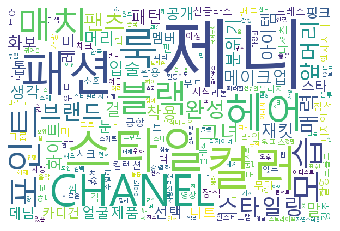

In [79]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('jenny_adj_twitter.png')

In [80]:
mag_jenny.to_csv('./magazine/final/mag_jenny_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)